In [190]:
import numpy as np
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
file_path = '/content/drive/MyDrive/For Colab/owid-covid-data.csv'

In [ ]:
new_name = '/content/drive/MyDrive/For Colab/covid-data.csv'
os.rename(file_path,new_name)

In [139]:
data = pd.read_csv('/content/drive/MyDrive/For Colab/covid-data.csv')
data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,total_vaccinations_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498


### **To check description click [here](https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-codebook.csv)**

In [141]:
data.describe(include=['O',int])

,iso_code,continent,location,date,tests_units
count,56140,55800,56464,56464,30296
unique,191,6,192,361,4
top,MEX,Africa,Mexico,2020-11-30,tests performed
freq,361,15438,361,192,18255


In [142]:
data.shape

(56464, 52)

In [143]:
data.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'total_vaccinations_per_hundred', 'stringency_index', 'population',
       'population_density', 'median_age', 'aged_65_older', 'ag

In [144]:
data.isnull().sum()

iso_code                                324
continent                               664
location                                  0
date                                      0
total_cases                             557
new_cases                               563
new_cases_smoothed                     1519
total_deaths                           8752
new_deaths                             8753
new_deaths_smoothed                    1519
total_cases_per_million                 881
new_cases_per_million                   887
new_cases_smoothed_per_million         1838
total_deaths_per_million               9063
new_deaths_per_million                 9064
new_deaths_smoothed_per_million        1838
reproduction_rate                     13961
icu_patients                          50269
icu_patients_per_million              50269
hosp_patients                         49537
hosp_patients_per_million             49537
weekly_icu_admissions                 55936
weekly_icu_admissions_per_millio

In [145]:
missing_percent = []
for i in data.columns:
  missing_percent.append(data[i].isnull().sum())

In [146]:
print(missing_percent)

[324, 664, 0, 0, 557, 563, 1519, 8752, 8753, 1519, 881, 887, 1838, 9063, 9064, 1838, 13961, 50269, 50269, 49537, 49537, 55936, 55936, 55611, 55611, 30344, 30411, 30411, 30344, 27262, 27262, 29218, 29679, 26168, 56413, 56413, 6534, 324, 1512, 2729, 3355, 3034, 2722, 19679, 2174, 1534, 13562, 14149, 29333, 6544, 612, 2486]


In [147]:
missing_percent = np.array(missing_percent)
missing_percent

array([  324,   664,     0,     0,   557,   563,  1519,  8752,  8753,
        1519,   881,   887,  1838,  9063,  9064,  1838, 13961, 50269,
       50269, 49537, 49537, 55936, 55936, 55611, 55611, 30344, 30411,
       30411, 30344, 27262, 27262, 29218, 29679, 26168, 56413, 56413,
        6534,   324,  1512,  2729,  3355,  3034,  2722, 19679,  2174,
        1534, 13562, 14149, 29333,  6544,   612,  2486])

In [148]:
percent = []

for i in missing_percent:
   percent.append((i*100) / data.shape[0])

In [149]:
print(percent)

[0.5738169453102862, 1.1759705298951544, 0.0, 0.0, 0.986469254746387, 0.9970954944743553, 2.6902096911306317, 15.500141683196373, 15.501912723151035, 2.6902096911306317, 1.5602862000566733, 1.5709124397846415, 3.255171436667611, 16.050935109096063, 16.052706149050724, 3.255171436667611, 24.725488807027485, 89.02840748087277, 89.02840748087277, 87.73200623406063, 87.73200623406063, 99.06489090393879, 99.06489090393879, 98.48930291867384, 98.48930291867384, 53.74043638424483, 53.85909606120714, 53.85909606120714, 53.74043638424483, 48.28209124397846, 48.28209124397846, 51.74624539529612, 52.562694814395016, 46.34457353357892, 99.90967696231228, 99.90967696231228, 11.571975063757439, 0.5738169453102862, 2.677812411448002, 4.833168036270898, 5.94183904788892, 5.373335222442618, 4.820770756588269, 34.852295267781244, 3.850240861433834, 2.7167752904505527, 24.018843865117596, 25.058444318503824, 51.94991499008218, 11.589685463304052, 1.0838764522527629, 4.402805327288184]


In [150]:
col = data.columns

for i in range(len(data.columns)):
  print(f'In column {col[i]}, {round(percent[i],4)} proportion data is missing\n')

In column iso_code, 0.5738 proportion data is missing

In column continent, 1.176 proportion data is missing

In column location, 0.0 proportion data is missing

In column date, 0.0 proportion data is missing

In column total_cases, 0.9865 proportion data is missing

In column new_cases, 0.9971 proportion data is missing

In column new_cases_smoothed, 2.6902 proportion data is missing

In column total_deaths, 15.5001 proportion data is missing

In column new_deaths, 15.5019 proportion data is missing

In column new_deaths_smoothed, 2.6902 proportion data is missing

In column total_cases_per_million, 1.5603 proportion data is missing

In column new_cases_per_million, 1.5709 proportion data is missing

In column new_cases_smoothed_per_million, 3.2552 proportion data is missing

In column total_deaths_per_million, 16.0509 proportion data is missing

In column new_deaths_per_million, 16.0527 proportion data is missing

In column new_deaths_smoothed_per_million, 3.2552 proportion data is m

**Removing Column where above 50% data is missing**

In [151]:
len(percent)

52

In [152]:
col_to_drop = []

for i in range(len(data.columns)):
  if (percent[i] > 50):          # threshold of 50
    temp = (data.columns[i] , percent[i] , i)
    col_to_drop.append(temp)

In [153]:
col_to_drop       # (column_name , missing_percentage , index_num)

[('icu_patients', 89.02840748087277, 17),
 ('icu_patients_per_million', 89.02840748087277, 18),
 ('hosp_patients', 87.73200623406063, 19),
 ('hosp_patients_per_million', 87.73200623406063, 20),
 ('weekly_icu_admissions', 99.06489090393879, 21),
 ('weekly_icu_admissions_per_million', 99.06489090393879, 22),
 ('weekly_hosp_admissions', 98.48930291867384, 23),
 ('weekly_hosp_admissions_per_million', 98.48930291867384, 24),
 ('new_tests', 53.74043638424483, 25),
 ('total_tests', 53.85909606120714, 26),
 ('total_tests_per_thousand', 53.85909606120714, 27),
 ('new_tests_per_thousand', 53.74043638424483, 28),
 ('positive_rate', 51.74624539529612, 31),
 ('tests_per_case', 52.562694814395016, 32),
 ('total_vaccinations', 99.90967696231228, 34),
 ('total_vaccinations_per_hundred', 99.90967696231228, 35),
 ('handwashing_facilities', 51.94991499008218, 48)]

In [154]:
d = data.iloc[:,[17,18,19,20,21,22,23,24,25,26,27,28,31,32,34,35,48]]

data.drop(d, axis=1, inplace=True)

In [155]:
data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,0.5,64.83,0.498


In [156]:
data.isnull().sum()

iso_code                             324
continent                            664
location                               0
date                                   0
total_cases                          557
new_cases                            563
new_cases_smoothed                  1519
total_deaths                        8752
new_deaths                          8753
new_deaths_smoothed                 1519
total_cases_per_million              881
new_cases_per_million                887
new_cases_smoothed_per_million      1838
total_deaths_per_million            9063
new_deaths_per_million              9064
new_deaths_smoothed_per_million     1838
reproduction_rate                  13961
new_tests_smoothed                 27262
new_tests_smoothed_per_thousand    27262
tests_units                        26168
stringency_index                    6534
population                           324
population_density                  1512
median_age                          2729
aged_65_older   

In [170]:
data.dropna(inplace=True)

In [171]:
data.continent.unique()

array(['South America', 'Oceania', 'Europe', 'Asia', 'North America',
       'Africa'], dtype=object)

In [172]:
data.isnull().sum()

iso_code                           0
continent                          0
location                           0
date                               0
total_cases                        0
new_cases                          0
new_cases_smoothed                 0
total_deaths                       0
new_deaths                         0
new_deaths_smoothed                0
total_cases_per_million            0
new_cases_per_million              0
new_cases_smoothed_per_million     0
total_deaths_per_million           0
new_deaths_per_million             0
new_deaths_smoothed_per_million    0
reproduction_rate                  0
new_tests_smoothed                 0
new_tests_smoothed_per_thousand    0
tests_units                        0
stringency_index                   0
population                         0
population_density                 0
median_age                         0
aged_65_older                      0
aged_70_older                      0
gdp_per_capita                     0
e

In [ ]:
# data.location.unique()

# for country in data.location.unique():
#   country+'_df' = data[data.location == country]

In [222]:
data.sort_values(by=['total_cases','total_deaths'],ascending=False).head(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index
53728,USA,North America,United States,2020-12-04,14434647.0,229606.0,183787.429,278965.0,2594.0,2001.000,43608.857,693.668,555.245,842.788,7.837,6.045,1.18,1665528.0,5.032,tests performed,71.76,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,2.77,78.86,0.924
53727,USA,North America,United States,2020-12-03,14205041.0,219607.0,180141.857,276371.0,2843.0,1834.143,42915.189,663.460,544.231,834.951,8.589,5.541,1.17,1585977.0,4.791,tests performed,71.76,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,2.77,78.86,0.924
53726,USA,North America,United States,2020-12-02,13985434.0,201661.0,165037.714,273528.0,2775.0,1605.857,42251.729,609.243,498.599,826.362,8.384,4.851,1.15,1500592.0,4.533,tests performed,71.76,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,2.77,78.86,0.924
53725,USA,North America,United States,2020-12-01,13783773.0,184277.0,162456.857,270753.0,2588.0,1536.143,41642.486,556.724,490.802,817.978,7.819,4.641,1.12,1517749.0,4.585,tests performed,75.46,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,2.77,78.86,0.924
53724,USA,North America,United States,2020-11-30,13599496.0,156840.0,161045.429,268165.0,1153.0,1470.143,41085.762,473.833,486.538,810.160,3.483,4.441,1.09,1533807.0,4.634,tests performed,75.46,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,2.77,78.86,0.924
53723,USA,North America,United States,2020-11-29,13442656.0,139414.0,162636.714,267012.0,842.0,1436.286,40611.929,421.187,491.346,806.676,2.544,4.339,1.06,1564847.0,4.728,tests performed,75.46,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,2.77,78.86,0.924
53722,USA,North America,United States,2020-11-28,13303242.0,155107.0,163643.571,266170.0,1212.0,1447.143,40190.742,468.597,494.388,804.133,3.662,4.372,1.06,1600894.0,4.836,tests performed,75.46,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,2.77,78.86,0.924
53721,USA,North America,United States,2020-11-27,13148135.0,204087.0,167242.143,264958.0,1426.0,1481.143,39722.145,616.572,505.259,800.471,4.308,4.475,1.06,1670693.0,5.047,tests performed,75.46,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,2.77,78.86,0.924
53720,USA,North America,United States,2020-11-26,12944048.0,113878.0,166151.143,263532.0,1245.0,1548.286,39105.572,344.040,501.963,796.163,3.761,4.678,1.05,1757516.0,5.310,tests performed,75.46,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,2.77,78.86,0.924
53719,USA,North America,United States,2020-11-25,12830170.0,183595.0,176925.143,262287.0,2287.0,1653.000,38761.533,554.663,534.513,792.402,6.909,4.994,1.06,1833614.0,5.540,tests performed,75.46,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,2.77,78.86,0.924




---







In [175]:
data.shape

(15650, 35)

In [176]:
data.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,new_tests_smoothed,new_tests_smoothed_per_thousand,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index
count,1.565000e+04,15650.000000,15650.000000,15650.000000,15650.000000,15650.000000,15650.000000,15650.000000,15650.000000,15650.000000,15650.00000,15650.000000,15650.000000,1.565000e+04,15650.000000,15650.000000,1.565000e+04,15650.000000,15650.000000,15650.000000,15650.000000,15650.000000,15650.000000,15650.000000,15650.000000,15650.000000,15650.000000,15650.000000,15650.000000,15650.000000
mean,2.640422e+05,3147.449712,3056.875290,8551.555527,71.307093,69.907139,4506.549017,61.826851,59.608983,139.914858,1.25148,1.211267,1.116521,4.264974e+04,1.039162,64.180719,6.799590e+07,159.054055,34.350626,11.752931,7.636485,23851.314702,7.034562,220.483602,6.875361,12.795827,30.811176,3.274947,75.835544,0.776112
std,1.007952e+06,11553.274185,11013.857523,25804.451898,216.591917,200.230740,7092.843858,137.522930,117.593935,217.480816,3.21505,2.397836,0.311234,1.499342e+05,1.785472,17.348930,1.828720e+08,244.796317,8.439123,6.196171,4.371545,18562.635175,14.818886,106.885081,2.624635,10.321952,13.521159,2.466174,6.241921,0.133270
min,1.010000e+02,-10034.000000,-525.000000,1.000000,-1918.000000,-232.143000,0.177000,-2153.437000,-276.825000,0.003000,-41.02300,-4.965000,0.170000,4.900000e+01,0.001000,2.780000,3.412500e+05,3.202000,16.400000,2.168000,1.308000,1095.042000,0.100000,85.998000,1.820000,0.300000,7.700000,0.300000,60.850000,0.437000
25%,3.560500e+03,31.000000,40.143000,66.000000,0.000000,0.429000,307.298500,2.626500,3.082250,5.758000,0.00000,0.040000,0.950000,2.136500e+03,0.105000,50.930000,6.948445e+06,37.728000,28.200000,6.293000,3.414000,8827.010000,0.200000,127.993000,4.970000,2.500000,20.400000,1.400000,72.590000,0.699000
50%,2.094600e+04,281.500000,290.357000,463.000000,4.000000,4.714000,1533.237000,15.077000,15.979500,34.092500,0.22200,0.267000,1.090000,6.989500e+03,0.413000,65.740000,1.912996e+07,85.129000,34.100000,11.198000,6.938000,22669.797000,1.000000,197.093000,6.800000,12.000000,30.000000,2.540000,76.880000,0.804000
75%,1.355912e+05,1492.000000,1454.107250,4574.500000,32.000000,32.678250,5463.507500,59.380500,60.384250,170.046500,1.24700,1.289000,1.250000,2.165225e+04,1.272000,78.700000,5.440979e+07,197.519000,41.800000,18.517000,11.690000,34272.360000,4.000000,282.280000,8.350000,20.900000,39.300000,4.510000,81.540000,0.880000
max,1.443465e+07,229606.000000,183787.429000,278965.000000,3852.000000,2241.286000,59134.855000,3142.293000,1536.030000,1479.083000,218.32900,33.838000,6.750000,1.833614e+06,19.288000,100.000000,1.380004e+09,1454.037000,47.900000,23.021000,16.240000,94277.965000,71.400000,539.849000,16.740000,35.300000,76.100000,12.270000,83.560000,0.953000


### **Cases in USA**

In [183]:
usa_data = data[data.iso_code == 'USA']
usa_data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index
53457,USA,North America,United States,2020-03-08,519.0,116.0,69.571,21.0,4.0,2.857,1.568,0.350,0.210,0.063,0.012,0.009,3.41,1172.0,0.004,tests performed,20.37,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,2.77,78.86,0.924
53458,USA,North America,United States,2020-03-09,594.0,75.0,77.000,22.0,1.0,2.286,1.795,0.227,0.233,0.066,0.003,0.007,3.30,1426.0,0.004,tests performed,20.37,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,2.77,78.86,0.924
53459,USA,North America,United States,2020-03-10,782.0,188.0,101.143,28.0,6.0,3.000,2.363,0.568,0.306,0.085,0.018,0.009,3.38,1772.0,0.005,tests performed,20.37,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,2.77,78.86,0.924
53460,USA,North America,United States,2020-03-11,1147.0,365.0,148.571,33.0,5.0,3.143,3.465,1.103,0.449,0.100,0.015,0.009,3.48,2294.0,0.007,tests performed,21.76,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,2.77,78.86,0.924
53461,USA,North America,United States,2020-03-12,1586.0,439.0,200.286,43.0,10.0,4.429,4.792,1.326,0.605,0.130,0.030,0.013,3.48,3355.0,0.010,tests performed,30.09,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,2.77,78.86,0.924


In [185]:
usa_data[usa_data.new_deaths == usa_data.new_deaths.max()]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index
53727,USA,North America,United States,2020-12-03,14205041.0,219607.0,180141.857,276371.0,2843.0,1834.143,42915.189,663.46,544.231,834.951,8.589,5.541,1.17,1585977.0,4.791,tests performed,71.76,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,2.77,78.86,0.924


In [184]:
usa_data[usa_data.new_cases == usa_data.new_cases.max()]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index
53728,USA,North America,United States,2020-12-04,14434647.0,229606.0,183787.429,278965.0,2594.0,2001.0,43608.857,693.668,555.245,842.788,7.837,6.045,1.18,1665528.0,5.032,tests performed,71.76,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,2.77,78.86,0.924


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


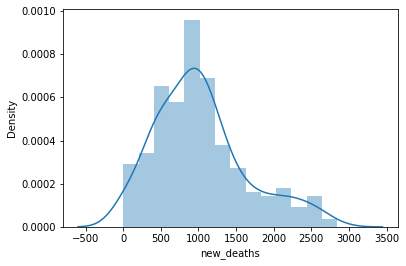

In [191]:
sbn.distplot(usa_data.new_deaths)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


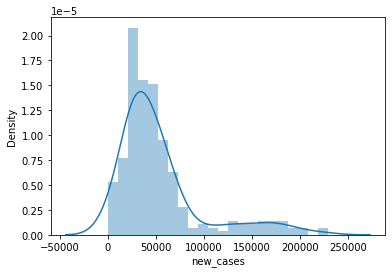

In [192]:
sbn.distplot(usa_data.new_cases)
plt.show()



---

---





### **Cases in Pakistan**

In [195]:
pk_data = data[data.location == 'Pakistan']
pk_data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index
38230,PAK,Asia,Pakistan,2020-03-18,454.0,155.0,62.000,2.0,2.0,0.286,2.055,0.702,0.281,0.009,0.009,0.001,2.25,242.0,0.001,tests performed,52.78,220892331.0,255.573,23.5,4.495,2.78,5034.708,4.0,423.031,8.35,2.8,36.7,0.6,67.27,0.562
38231,PAK,Asia,Pakistan,2020-03-19,501.0,47.0,67.571,3.0,1.0,0.429,2.268,0.213,0.306,0.014,0.005,0.002,2.17,411.0,0.002,tests performed,52.78,220892331.0,255.573,23.5,4.495,2.78,5034.708,4.0,423.031,8.35,2.8,36.7,0.6,67.27,0.562
38232,PAK,Asia,Pakistan,2020-03-20,730.0,229.0,99.857,3.0,0.0,0.429,3.305,1.037,0.452,0.014,0.000,0.002,2.11,485.0,0.002,tests performed,52.78,220892331.0,255.573,23.5,4.495,2.78,5034.708,4.0,423.031,8.35,2.8,36.7,0.6,67.27,0.562
38233,PAK,Asia,Pakistan,2020-03-21,776.0,46.0,103.286,5.0,2.0,0.714,3.513,0.208,0.468,0.023,0.009,0.003,2.02,649.0,0.003,tests performed,55.56,220892331.0,255.573,23.5,4.495,2.78,5034.708,4.0,423.031,8.35,2.8,36.7,0.6,67.27,0.562
38234,PAK,Asia,Pakistan,2020-03-22,875.0,99.0,105.571,6.0,1.0,0.857,3.961,0.448,0.478,0.027,0.005,0.004,1.95,659.0,0.003,tests performed,55.56,220892331.0,255.573,23.5,4.495,2.78,5034.708,4.0,423.031,8.35,2.8,36.7,0.6,67.27,0.562


In [196]:
pk_data[pk_data.new_deaths == pk_data.new_deaths.max()]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index
38476,PAK,Asia,Pakistan,2020-11-19,368665.0,2738.0,2338.429,7561.0,313.0,67.0,1668.981,12.395,10.586,34.229,1.417,0.303,1.26,35029.0,0.159,tests performed,47.69,220892331.0,255.573,23.5,4.495,2.78,5034.708,4.0,423.031,8.35,2.8,36.7,0.6,67.27,0.562


In [197]:
pk_data[pk_data.new_deaths == pk_data.new_deaths.min()]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index
38232,PAK,Asia,Pakistan,2020-03-20,730.0,229.0,99.857,3.0,0.0,0.429,3.305,1.037,0.452,0.014,0.0,0.002,2.11,485.0,0.002,tests performed,52.78,220892331.0,255.573,23.5,4.495,2.78,5034.708,4.0,423.031,8.35,2.8,36.7,0.6,67.27,0.562
38288,PAK,Asia,Pakistan,2020-05-15,38799.0,0.0,1437.571,834.0,0.0,28.286,175.647,0.000,6.508,3.776,0.0,0.128,1.23,12458.0,0.056,tests performed,89.81,220892331.0,255.573,23.5,4.495,2.78,5034.708,4.0,423.031,8.35,2.8,36.7,0.6,67.27,0.562
38316,PAK,Asia,Pakistan,2020-06-12,125933.0,0.0,4564.286,2463.0,0.0,75.429,570.110,0.000,20.663,11.150,0.0,0.341,1.21,24407.0,0.110,tests performed,61.11,220892331.0,255.573,23.5,4.495,2.78,5034.708,4.0,423.031,8.35,2.8,36.7,0.6,67.27,0.562
38337,PAK,Asia,Pakistan,2020-07-03,221896.0,0.0,3287.571,4551.0,0.0,73.714,1004.544,0.000,14.883,20.603,0.0,0.334,0.87,22537.0,0.102,tests performed,66.67,220892331.0,255.573,23.5,4.495,2.78,5034.708,4.0,423.031,8.35,2.8,36.7,0.6,67.27,0.562
38350,PAK,Asia,Pakistan,2020-07-16,257914.0,0.0,2045.000,5426.0,0.0,52.571,1167.601,0.000,9.258,24.564,0.0,0.238,0.75,22964.0,0.104,tests performed,66.67,220892331.0,255.573,23.5,4.495,2.78,5034.708,4.0,423.031,8.35,2.8,36.7,0.6,67.27,0.562
38360,PAK,Asia,Pakistan,2020-07-26,273113.0,0.0,1147.143,5822.0,0.0,31.857,1236.408,0.000,5.193,26.357,0.0,0.144,0.69,20931.0,0.095,tests performed,66.67,220892331.0,255.573,23.5,4.495,2.78,5034.708,4.0,423.031,8.35,2.8,36.7,0.6,67.27,0.562
38366,PAK,Asia,Pakistan,2020-08-01,278305.0,0.0,741.714,5951.0,0.0,18.429,1259.912,0.000,3.358,26.941,0.0,0.083,0.71,23606.0,0.107,tests performed,66.67,220892331.0,255.573,23.5,4.495,2.78,5034.708,4.0,423.031,8.35,2.8,36.7,0.6,67.27,0.562
38369,PAK,Asia,Pakistan,2020-08-04,280461.0,0.0,748.000,5999.0,0.0,19.143,1269.673,0.000,3.386,27.158,0.0,0.087,0.73,16110.0,0.073,tests performed,66.67,220892331.0,255.573,23.5,4.495,2.78,5034.708,4.0,423.031,8.35,2.8,36.7,0.6,67.27,0.562
38382,PAK,Asia,Pakistan,2020-08-17,289215.0,0.0,650.714,6175.0,0.0,11.143,1309.303,0.000,2.946,27.955,0.0,0.050,0.84,21717.0,0.098,tests performed,47.69,220892331.0,255.573,23.5,4.495,2.78,5034.708,4.0,423.031,8.35,2.8,36.7,0.6,67.27,0.562
38389,PAK,Asia,Pakistan,2020-08-24,293261.0,0.0,578.000,6244.0,0.0,9.857,1327.620,0.000,2.617,28.267,0.0,0.045,0.85,23416.0,0.106,tests performed,47.69,220892331.0,255.573,23.5,4.495,2.78,5034.708,4.0,423.031,8.35,2.8,36.7,0.6,67.27,0.562


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


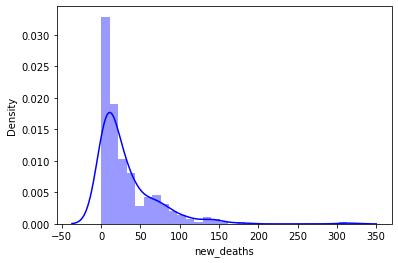

In [204]:
sbn.distplot(pk_data.new_deaths,color='b',)
plt.show()

In [205]:
pk_data[pk_data.new_cases == pk_data.new_cases.max()]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index
38318,PAK,Asia,Pakistan,2020-06-14,144478.0,12073.0,5829.571,2729.0,178.0,94.571,654.065,54.656,26.391,12.354,0.806,0.428,1.2,26422.0,0.12,tests performed,61.11,220892331.0,255.573,23.5,4.495,2.78,5034.708,4.0,423.031,8.35,2.8,36.7,0.6,67.27,0.562


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


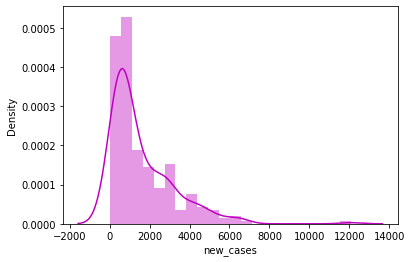

In [213]:
sbn.distplot(pk_data.new_cases, color='m')
plt.show()